# Feature Engineering

## Import libraries

In [87]:
import pandas as pd
import numpy as np
import pylab
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import datasets, linear_model, metrics, preprocessing, pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Import Dataframe

In [30]:
df = pd.read_csv('csv_files/12_12_DF_log_state_FINAL.csv')

### Initial look at dataframe

In [31]:
df.tail()

,Life Expectancy,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.102956,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,2.342667,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.084430,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,0.477728,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.419728,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Test, Train, Split

In [32]:
# the target is panda series of the dependent variable
target = df['Life Expectancy'] 

# make dataframe of just feature, or independent variables
features = df.drop(columns=['Life Expectancy']) # taking target out of dataframe

# look at features dataframe
features.tail()

,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# split the data to train and test our model
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0,test_size=0.2)


In [34]:
# check the length of our train and test dataframes

print(' Length of ',
    '\n Feautures Training Data:',len(X_train),
    '\n Features Test Data:', len(X_test), 
    '\n Target Training Data:', len(y_train),
    '\n Target Test Data:', len(y_test))

 Length of  
 Feautures Training Data: 2386 
 Features Test Data: 597 
 Target Training Data: 2386 
 Target Test Data: 597


## Ordinary Least Squares

Using the sum of the squared differences between our features (the observed dependent features), such as percent of the population that are smokers per county and percent of that population that is obese, we calculated the error.

In [35]:
# set the X_train dataframe to a variable to build a linear regression model with
# predictors = X_train #features

# # add constant term to predictors
# predictors_int = sm.add_constant(predictors)

# # make a model based on OLS
# model = sm.OLS(y_train,predictors_int).fit()#sm.OLS(df['Life Expectancy'],predictors_int).fit()

# # print out a summary of the model
# model.summary()

# r-sq is 0.799, which is very good! 

r-sq = "translates in the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, that which the model and predictors fail to grasp."

adj. r-sq is 0.794, which is also great.

From our initial model readout above, it looks like log_food_stamps, AZ, CO, CT, FL, GA, ME, MA, MS, RI, TX, UT all have p-values > 0.05, meaning that there is no statistically significant relationship between these variables and Life Expectancy. 

**later we might want to take out the above ^ features and see if we can get our p-value higher**

We have slight negative skew at -0.285 and we are leptokurtic at 5.619, the latter meaning that we have some outlier data points, or occasional values exceeding (in terms of standard deviations from the mean) what is predicted by the normal distribution.

In [36]:
# predict new y values
# y_ols_pred = model.predict(sm.add_constant(X_test))


In [37]:
# plot the y-values our model (based on the training data) predicted vs the y-values from our test data to evaluate our model's performance
# plt.scatter(y_test, y_ols_pred, alpha=0.4)
# plt.xlabel('Test Y-Values')
# plt.ylabel('Predicted Y-Values from Baseline Model')

^ why are we doing this above and why are we doing regression with scikit learn and statsmodel? Let's just use 1. I vote for scikit learn. - AL


## Scikit-learn regression

In [38]:
# set the y variable to Life Expectancy
y = df['Life Expectancy']

# set the linear regression method to a variable
linreg = LinearRegression()

# fit a linear regression to the predictors (features) and life expectancy
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# get coefficients of the linear regression
print(linreg.coef_ ,  '\n There are',len(linreg.coef_),'coefficients for the linear regression','\n the y-intercept is ', linreg.intercept_)
print('The model is a ', type(linreg))
print('The R-squared value is ', linreg.score(X_train, y_train), 'which maps to the OLS R-squared value of .808')


[-5.15420169e-01 -2.72497735e-01 -1.01091241e-01  2.66770325e-03
 -3.96522465e+10 -3.96522465e+10  2.90474718e-01 -3.96522465e+10
 -3.96522465e+10 -3.96522465e+10  9.72876430e-01 -3.96522465e+10
  1.41429901e-02  9.52096611e-01  6.84298515e-01  8.15558076e-01
  1.02209473e+00  1.16933823e+00  8.40753555e-01  6.28746033e-01
  1.97726965e-01 -3.96522465e+10  4.30167198e-01 -3.96522465e+10
  1.29209709e+00  1.38575363e+00 -1.52824402e-01  9.38953400e-01
  4.34665680e-01  1.05021095e+00  4.92664337e-01  7.33026862e-01
  4.29213524e-01 -3.96522465e+10  8.58562469e-01  4.07265663e-01
  1.16956902e+00 -3.96522465e+10  2.16690063e-01 -3.96522465e+10
  1.00573635e+00 -3.96522465e+10  2.15647697e-01  9.47994232e-01
  2.36842155e-01  1.29531860e-01  4.80136871e-02  5.27268887e-01
  4.52423096e-01 -3.96522465e+10  6.92344666e-01  1.19766808e+00
  3.89728069e-01  3.96522465e+10] 
 There are 54 coefficients for the linear regression 
 the y-intercept is  -0.6100600790028065
The model is a  <class 's

In [40]:
# predict the y value from the linear regression model
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [41]:
# look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [42]:
from sklearn.metrics import mean_squared_error

# calculate the RMSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.201118626937046
Test Mean Squarred Error: 0.17353431321031754


Text(0,0.5,'Predicted Values')

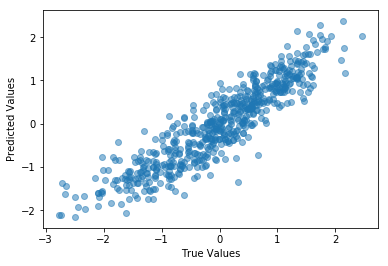

In [43]:
# plot the predicted y-value vs the true-value 
# diff between y-hat and true-y = the residuals
plt.scatter(y_test, y_hat_test, alpha = 0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Feature Selection

## Wrapper Method: Recursive Feature Elimination 
After the initial scikit-Learn linear regression. We started to do some feature selection, starting with the wrapper method, which picks the top *n* features from your model.

From [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE): "...the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."

In [80]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 54)
selector = selector.fit(X_train, y_train)

In [81]:
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [82]:
# Fit the linear regression model again using the 5 columns selected
selected_columns = X_train.columns[selector.support_ ]
model = linreg.fit(X_train[selected_columns],y_train)

In [83]:
# predict y-hat using new model
yhat = model.predict(X_train[selected_columns])

In [84]:
# Comparing metrics w/baseline model
SS_Residual = np.sum((y_train-yhat)**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train[selected_columns].shape[1]-1)
train_mse = mean_squared_error(y_train, yhat)

In [85]:
print('R Squarred Error:', r_squared)
print('Adjusted R Squarred Error:', adjusted_r_squared)
print('Train Mean Squarred Error:', train_mse)

R Squarred Error: 0.7987305146787826
Adjusted R Squarred Error: 0.7940679011192178
Train Mean Squarred Error: 0.201118626937046


We can see that when we only use the top 5 features for our model our r-squared value significantly decreases from ~ 80% to ~ 60%, meaning that we want to include more features than just the top 5.

After playing around a bit with the *n* value, we found that n = 54 gave us the highest r-squared and adjusted r-squared value (0.7987306319927164 and 0.7940680211508488, respectively). Since we know that our df only has 54 columns, this value doesn't really tell us much about how best features. It's essentially saying that the 54 features we have are the best ones to use (ie our baseline model is best so far).


## Filter Method 1: Variance Threshold

"is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples." - [Documentation](https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold)

In [68]:
from sklearn.feature_selection import VarianceThreshold


In [69]:
thresholder = VarianceThreshold(threshold=0)

def variance_threshold_selector(data, threshold=0):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [70]:
features_selected_train = variance_threshold_selector(X_train)


In [71]:
features_selected_train.head()

,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
369,0.962157,0.644085,0.069035,-0.158180,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,-1.248202,-0.680676,-0.688419,0.751310,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1628,-0.981016,-0.278517,-1.635237,-1.058666,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2696,-0.665250,-1.390370,-0.783101,0.156292,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1275,0.063440,-0.609707,0.258399,0.315317,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# now that we have tossed out any features with low variance, let's run our model again
# to see if we can get higher metrics

linreg = LinearRegression()
fitting_model = linreg.fit(features_selected_train, y_train)

y_hat = linreg.predict(features_selected_train)


In [75]:
SS_Residual = np.sum((y_train-y_hat)**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-features_selected_train.shape[1]-1)
train_mse_filter = mean_squared_error(y_train, y_hat)

In [76]:
print('R Squarred Error:', r_squared)
print('Adjusted R Squarred Error:', adjusted_r_squared)
print('Train Mean Squarred Error:', train_mse_filter)

R Squarred Error: 0.7987305146787826
Adjusted R Squarred Error: 0.7940679011192178
Train Mean Squarred Error: 0.201118626937046


In [336]:
## ORIGINAL ANALYSIS, WITH THRESHOLD OF 0.5
# we can see that filtering out low-variance features actually made our model worse in terms
# of r-sq and adjusted r-sq, but we got a higher RMSE than our base model

In [444]:
## SUBSEQUENT ANALYSIS WITH THRESHOLD OF 0
# after playing around with some different threshold values, we found that having no threshold
# still gave us the best r-sq and adjusted r-sq values, even though these had a inverse relationship
# with our RMSE value(ie our RMSE lowered the higher our r-sq and adj. r-sq values got)
# This ^ indicates that our original model is still our best

## Filter Method 2: Univariate Feature Selection

"Univariate feature selection works by selecting the best features based on univariate statistical tests....removes all but the  highest scoring features" - [Documentation](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

Returns scores and p-values of features

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [106]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [107]:
features_selected_train = information_selector(X_train, y_train, mutual_info_regression, k=26)


In [108]:
linreg = LinearRegression()
fitting_model = linreg.fit(features_selected_train, y_train)

y_hat = linreg.predict(features_selected_train)

In [114]:
SS_Residual = np.sum((y_train-y_hat)**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-features_selected_train.shape[1]-1)
train_mse_filter = mean_squared_error(y_train, y_hat)

In [117]:
print('R Squarred Error:', r_squared)
print('Adjusted R Squarred Error:', adjusted_r_squared)
print('Train Mean Squarred Error:', train_mse_filter)
print('Train Mean Squarred Error:', train_mse_filter)

R Squarred Error: 0.7504989437248331
Adjusted R Squarred Error: 0.7477490380600792
Train Mean Squarred Error: 0.24931404667389212
Train Mean Squarred Error: 0.24931404667389212


In [496]:
# Here, we got pretty close to some pretty good metrics. This is the highest RMSE we've seen, but
# our original model still has the highest r-sq and adj. r-sq values. 

# After toggling our k-value a bit, we found that k=26 gave us the best results.

## Polynomial Terms

In [118]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(X_train.columns))
features_train.head()

,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,West Virginia^2,West Virginia Wisconsin,West Virginia Wyoming,West Virginia Min Wages Dummies,Wisconsin^2,Wisconsin Wyoming,Wisconsin Min Wages Dummies,Wyoming^2,Wyoming Min Wages Dummies,Min Wages Dummies^2
0,0.962157,0.644085,0.069035,-0.158180,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.248202,-0.680676,-0.688419,0.751310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.981016,-0.278517,-1.635237,-1.058666,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.665250,-1.390370,-0.783101,0.156292,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063440,-0.609707,0.258399,0.315317,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
linreg = LinearRegression()
fitting_model = linreg.fit(features_train, y_train)

y_hat = linreg.predict(features_train)

In [120]:
SS_Residual = np.sum((y_train-y_hat)**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-features_train.shape[1]-1)


In [123]:
print('R Squarred Error:', r_squared)
print('Adjusted R Squarred Error:', adjusted_r_squared)

R Squarred Error: 0.8386888897415672
Adjusted R Squarred Error: 0.5452399551225032


In [ ]:
# Interesting! So, we raised our r-sq value by adding polynomial terms, but we greatly 
# decreased our adj. r-sq value, which is very bad! This means _ . 

# So, let's not include
# polynomial terms in our model for now. At a later date, we can see exactly which polynomial
# features are bringing our adj. r-sq down and get rid of them.

# LASSO method

Using the "Least Absolute Shrinkage and Selection Operator" or LASSO to fit a model. LASSO performs L1 regularization and selects features.

In [143]:
# Changing the alpha values to test what amount of features we should include for the model
lasso = Lasso(alpha=0.01) 
lasso.fit(X_train, y_train)
print('Training r^2, alpha=0.001:', lasso.score(X_train, y_train))
print('Testing r^2, alpha=0.001:', lasso.score(X_test, y_test))
print('Training MSE, alpha=0.001:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE, alpha=0.001:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2, alpha=0.001: 0.7166136236122627
Testing r^2, alpha=0.001: 0.7369604519128783
Training MSE, alpha=0.001: 0.28317396857653937
Testing MSE, alpha=0.001: 0.263763181776097


In [144]:
lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, y_train)
print('Training r^2, alpha=0.001:', lasso.score(X_train, y_train))
print('Testing r^2, alpha=0.001:', lasso.score(X_test, y_test))
print('Training MSE, alpha=0.001:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE, alpha=0.001:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2, alpha=0.001: 0.7921965337180782
Testing r^2, alpha=0.001: 0.8221719437708916
Training MSE, alpha=0.001: 0.20764771045486013
Testing MSE, alpha=0.001: 0.17831726925151567


In [150]:
# this alpha value has the highest r squared value
lasso = Lasso(alpha=0.0001) 
lasso.fit(X_train, y_train)
print('Training r^2, alpha=0.0001:', lasso.score(X_train, y_train))
print('Testing r^2, alpha=0.0001:', lasso.score(X_test, y_test))
print('Training MSE, alpha=0.0001:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE, alpha=0.0001:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2, alpha=0.0001: 0.7982144672687571
Testing r^2, alpha=0.0001: 0.8281030382094214
Training MSE, alpha=0.0001: 0.20163428755183385
Testing MSE, alpha=0.0001: 0.17236985810403693


In [146]:
# set the y test data set to a pandas dataframe in order to use the .outcome.std() method
y_test_df = y_test.to_frame(name='outcome')
# check the columns of the y test dataframe
y_test_df.columns

Index(['outcome'], dtype='object')

MSE: 0.1772447326758618
RMSE: 0.4210044330833843
0.4200742604933722


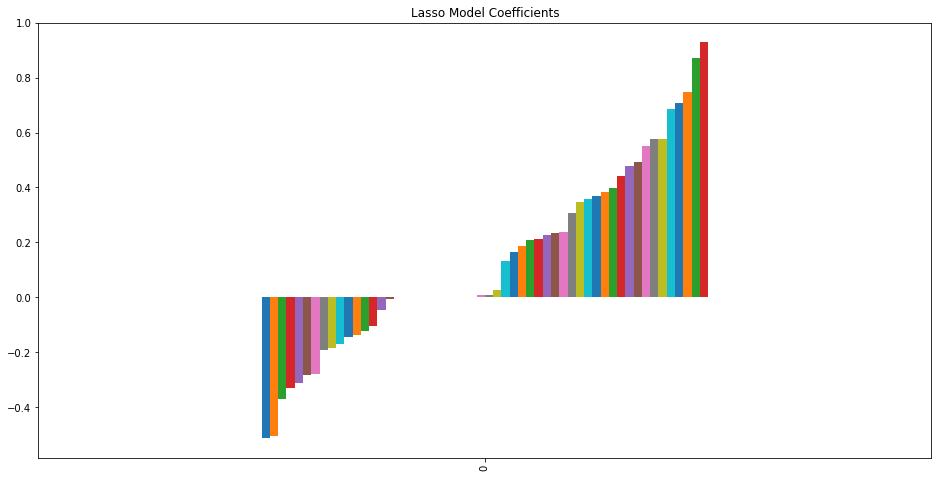

In [147]:
lassoReg = Lasso(alpha=0.0001, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse and rmse
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test_df.outcome.std())

coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))

In [151]:

print('\n There are',len(lasso.coef_),'coefficients for LASSO')
print('Lasso parameter coefficients:', lasso.coef_)


 There are 54 coefficients for LASSO
Lasso parameter coefficients: [-5.11870686e-01 -2.77805299e-01 -1.10127598e-01  1.42949567e-03
  4.46042731e-01 -1.05460153e-02  1.39020800e-01 -2.82006359e-01
 -1.28288871e-01  0.00000000e+00  5.82858920e-01 -5.27575805e-02
 -1.24935274e-01  6.79105805e-01  5.28486410e-01  6.65460026e-01
  8.73670319e-01  1.01121575e+00  6.84156688e-01  4.82916908e-01
  4.57670508e-02  1.20688830e-01  2.68101307e-01  8.13529071e-04
  1.15339046e+00  1.22923198e+00 -2.81392915e-01  7.89726598e-01
  2.69034840e-01  8.87054558e-01  3.27128911e-01  5.44100596e-01
  2.68499942e-01 -4.16982100e-01  7.00626036e-01  2.62563843e-01
  1.00299216e+00  3.07864747e-01  5.94427239e-02  1.36373517e-01
  8.51627990e-01 -0.00000000e+00  7.23614265e-02  7.87861684e-01
  9.19881227e-02 -1.98301704e-02 -8.95171158e-02  3.50360859e-01
  2.98088354e-01  2.02346844e-01  5.39705840e-01  1.04577953e+00
  2.13412329e-01  5.42922945e-01]


# Final Thoughts

Our original linear regression model (using Scikit-Learn) is still the best, according to the methods we used here (including the Wrapper Method, Variance Threshold, Univariate Feature Selection, fitting the model with polynomial terms, LASSO). We ended and began with a r-squared value of 0.7987305146787826.

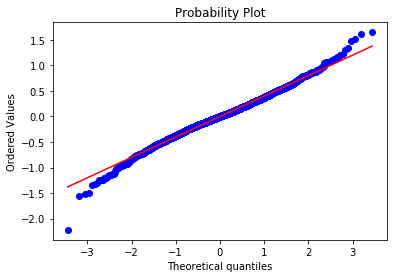

In [142]:
# plotting our model's residuals against a normal distribution to evaluate normality, presence of outliers, etc.
residuals = y_train-y_hat
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

qq plot documentation [here](http://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot.html)